## Till last it giving you response based on combined tools , now from tools it will call LLM model as well.

### Aim

- Create a chatbot with tools capabilities from arxiv,wikipedia search and some functions


In [4]:
from langchain_community.utilities.wikipedia import WikipediaAPIWrapper
from langchain_community.utilities.arxiv import ArxivAPIWrapper
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.tools import WikipediaQueryRun

/Users/pawanrai/Documents/Agentic_AI/myenv_Agentic/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# Read for Arxiv
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2 , doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [6]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

- Now in above cell when **`arxiv`** is invoked , for research paper named as **`Attention is all you need`** , it will search for whole arxiv paper and give you top best results out of it

In [7]:
## WIKIEDIA

api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1 , doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [8]:
wiki.invoke("What is full form of TESLA")

'Page: Tesla, Inc.\nSummary: Tesla, Inc. ( TEZ-lə or   TESS-lə) is an American multinational automotive and clean energy company. Headquartered in Austin, Texas, it designs, manufactures and sells battery electric vehicles (BEVs), stationary battery energy storage devices from home to grid-scale, solar panels and solar shingles, and related products and services.\nTesla was incorporated in July 2003 by Martin Eberhard and Marc Tarpenning as Tesla Motors. Its name is a tribute to the inventor and el'

## **`Tavily Search`** 

- Basically Tavily search is used for searching or browsing content . It need API key to fetch the details , monthly it provides 1000 search.

In [9]:
from dotenv import load_dotenv
load_dotenv()
import os

os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACKING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "ReAct-agent"

In [10]:
### Define some custom Functions
def mul(a:int,b:int)->int:
    """Multiply a and b
    Args:
        a:first int
        b:second int
    """
    return a*b

def add(a:int,b:int)->int:
    """Addition of a and b
    Args:
        a:first int
        b:second int
    """
    return a+b

def substraction(a:int,b:int)->int:
    """Substraction of values a and b
    Args:
        a:first int
        b:second int
    """
    return a-b

def Division(a:int,b:int)->int:
    """Division of values a and b
    Args:
        a:first int
        b:second int
    """
    return a/b

In [11]:
## Getting my Tavily search tool
from langchain_community.tools.tavily_search import TavilySearchResults
tavily_tools = TavilySearchResults()

/var/folders/3w/93q0p4yx18x1yzz2mdxyb0lr0000gn/T/ipykernel_77928/2848471507.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily_tools = TavilySearchResults()


In [12]:
tavily_tools.invoke("Provide me detail for Tavily search engine for LLM use")

[{'title': 'Tavily Search - ️   LangChain',
  'url': 'https://python.langchain.com/docs/integrations/tools/tavily_search/',
  'content': 'Skip to main content\n\nThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docs\n\n# Tavily Search\n\nTavily\'s Search API is a search engine built specifically for AI agents (LLMs), delivering real-time, accurate, and factual results at speed.\n\n## Overview\u200b\n\n### Integration details\u200b\n\n| Class | Package | Serializable | JS support | Package latest |\n ---  --- \n| TavilySearch | langchain-tavily | ✅ | ✅ |  |\n\n### Tool features\u200b [...] # Initialize Tavily Search Tool tavily_search_tool = TavilySearch(tavily_search_tool =  TavilySearch(    max_results=5,     max_results = 5,     topic="general",     topic = "general", ) )  agent = create_react_agent(llm, [tavily_search_tool]) agent =  create_react_agent(llm,  [tavily_search_tool])  user_input = "What natio

In [13]:
tavily_tools.invoke("Provide me detail for IREDA share news for today")

[{'title': "IREDA shares rise 2.03% in today's trading session - Moneycontrol",
  'url': 'https://www.moneycontrol.com/news/business/stocks/ireda-shares-rise-2-03-in-today-s-trading-session-alpha-article-13587254.html',
  'content': "Indian Renewable Energy Development Agency shares gained 2.03% to trade at Rs 149.25 in Monday's session. Alpha Desk. first published: Sep 29,",
  'score': 0.82186085},
 {'title': "IREDA shares drop 31% in 2025 so far; here's what analysts say",
  'url': 'https://www.businesstoday.in/markets/stocks/story/ireda-shares-drop-31-in-2025-so-far-heres-what-analysts-say-495537-2025-09-24',
  'content': "Prashun Talukdar\nTrusted Source Badge\nIREDA shares drop 31% in 2025 so far; here's what analysts sayIREDA: The stock has declined 31.15 per cent so far in the calendar year 2025.\n\nShares of Indian Renewable Energy Development Agency Ltd (IREDA) dropped 2.02 per cent to close at Rs 152.70 on Wednesday. At this level, the stock has declined 31.15 per cent so far

In [14]:
### Now will combine all tools into a List 

tools = [arxiv , wiki , tavily_tools ,add , mul , substraction , Division]

In [15]:
## Initilize my LLM model
from langchain_groq import ChatGroq
llm = ChatGroq(model = "qwen/qwen3-32b")
llm_with_tools = llm.bind_tools(tools)


In [16]:
from pprint import pprint
from langchain_core.messages import AIMessage,HumanMessage
response = llm_with_tools.invoke([HumanMessage(content=f"What is recent AI news  for last two days ?")])


In [17]:
pprint(response)

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent AI news from the last two days. I need to figure out which tool to use here. Let me check the available functions.\n\nThe tools provided include arxiv, wikipedia, tavily_search_results_json, and some math operations. The question is about current events, specifically recent news. The arxiv is for scientific papers, which might not be the best fit here. Wikipedia is more for general knowledge and historical information, not the latest news. The tavily_search_results_json is described as a search engine optimized for current events, so that seems like the right choice. \n\nI should use tavily_search_results_json with a query for "recent AI news last two days". That should fetch the latest updates. I don\'t think the math functions are relevant here. Let me make sure the parameters are correct. The function requires a query string, which I\'ll provide. Alright, I\'ll call that function with 

In [18]:
tool_calls = response.tool_calls

if tool_calls:
    print("Agent made the following tool calls:")
    pprint(tool_calls)
    
    # You can loop through them to get details
    for tool_call in tool_calls:
        print("\n--- Tool Call Details ---")
        print(f"Tool Name: {tool_call.get('name')}")
        print(f"Tool Arguments: {tool_call.get('args')}")
        print(f"Tool Call ID: {tool_call.get('id')}")
else:
    print("No tools were called.")

Agent made the following tool calls:
[{'args': {'query': 'recent AI news last two days'},
  'id': '22df0xv1r',
  'name': 'tavily_search_results_json',
  'type': 'tool_call'}]

--- Tool Call Details ---
Tool Name: tavily_search_results_json
Tool Arguments: {'query': 'recent AI news last two days'}
Tool Call ID: 22df0xv1r


In [19]:
# Define State schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

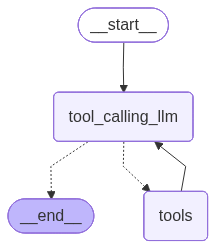

In [26]:
### Now we have create an entire chatbot , calling StateGraph tool condition etc

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

##  Node definition

builder = StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))


## Edge definition

builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> Tools_condition routes to tools
    # If the latest message (result) from assistant is not a tool call -> tools_condition outes to END
    tools_condition
)

## Previously it suppose to be 

# ================================
# builder.add_edge("tools",END)
# ================================

# But know instead of calling END it will call tool_calling_llm
builder.add_edge("tools","tool_calling_llm")



graph_builder = builder.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [27]:
# Invocation

## Here you can see below in results in AI message Tool calls: It will give arxiv

messages = graph_builder.invoke({"messages":"Attention is all you need"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Attention is all you need
================================== Ai Message ==================================
Tool Calls:
  arxiv (0yvkb4n42)
 Call ID: 0yvkb4n42
  Args:
    query: Attention is all you need
================================= Tool Message =================================
Name: arxiv

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time o
================================== Ai Message ==================================

The paper **"Attention Is All You Nee

In [28]:
# Invocation

## Here you can see below in results in AI message Tool calls: It will give Tavily

messages = graph_builder.invoke({"messages":"Who won Asian cricket championship between India and Pakistan 2025 ?"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Who won Asian cricket championship between India and Pakistan 2025 ?
================================== Ai Message ==================================

The Asian Cricket Championship, known as the Asia Cup, is scheduled to be held in 2025, but as of the current date (October 17, 2023), the tournament has not yet taken place. Therefore, there is no official result for the 2025 Asia Cup between India and Pakistan. The next Asia Cup (men's) after 2023 is expected in 2025, but it has not occurred yet. The most recent winner (2023) was Pakistan. For the 2025 result, you would need to wait until the tournament is played.


In [29]:
# Invocation

## Here you can see below in results in AI message Tool calls: It will give wikipedia

messages = graph_builder.invoke({"messages":"Who is Elon Musk ?"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Who is Elon Musk ?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (m72egs6c8)
 Call ID: m72egs6c8
  Args:
    query: Elon Musk
================================= Tool Message =================================
Name: wikipedia

Page: Elon Musk
Summary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is an international businessman and entrepreneur known for his leadership of Tesla, SpaceX, X (formerly Twitter), and the Department of Government Efficiency (DOGE). Musk has been the wealthiest person in the world since 2021; as of May 2025, Forbes estimates his net worth to be US$424.7 billion.
Born to a wealthy family in Pretoria, South Africa, Musk emigrated in 1989 to Canada; he had obtained Canadian citizenship at birth
================================== Ai Message ==================================

Elon Musk is a prominent businessman and entrepreneu

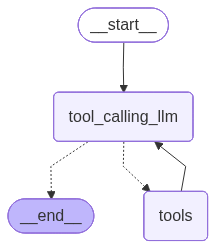

In [30]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [31]:
# Invocation

## Here you can see below in results in AI message Tool calls: Ia complex calculation

messages = graph_builder.invoke({"messages":" What is sum of 2449 and 500 then ,  show me multiplication of 2449 and 277 , "})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

 What is sum of 2449 and 500 then ,  show me multiplication of 2449 and 277 , 
================================== Ai Message ==================================
Tool Calls:
  add (9vjqyjzma)
 Call ID: 9vjqyjzma
  Args:
    a: 2449
    b: 500
  mul (0zh3q0sef)
 Call ID: 0zh3q0sef
  Args:
    a: 2449
    b: 277
================================= Tool Message =================================
Name: add

2949
================================= Tool Message =================================
Name: mul

678373
================================== Ai Message ==================================

The sum of 2449 and 500 is **2949**.  

The multiplication of 2449 and 277 is **678,373**.  

Let me know if you need further calculations!


In [34]:
# Invocation

## Here you can see below in results in AI message Tool calls: Ia complex combined conversation

messages = graph_builder.invoke({"messages":" Give me top 10 sports news in cricket from 27th Sep 2025 to now , Give me multiplication of 2449 and 277 then divide by 277"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

 Give me top 10 sports news in cricket from 27th Sep 2025 to now , Give me multiplication of 2449 and 277 then divide by 277
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (4pzactgj1)
 Call ID: 4pzactgj1
  Args:
    query: top 10 cricket news sports from 27th Sep 2025 to 2023-10-27
  mul (9yc439dqe)
 Call ID: 9yc439dqe
  Args:
    a: 2449
    b: 277
  Division (2x1x779qc)
 Call ID: 2x1x779qc
  Args:
    a: 677773
    b: 277
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "NDTV Sports: Latest Sports News, Live Scores, Results ...", "url": "https://sports.ndtv.com/", "content": "### PKL Season 12 Makes A Grand Return To Chennai Kabaddi Sep 28, 2025 facebook;) twitter;) WhatsApp;) reddit;) Snapchat;)\n ### Mary Kom On Theft At Her Faridabad House: \"CCTV Sho

# Agent Memory

### Aim 

- Let introduce Agent with Memory 

#### Types of memory in agents

- Short-term memory (contextual)
    - Stores recent conversation turns or actions.
        Used for continuity in multi-turn interactions.
        Example: remembering the last SQL query result when refining the next query.
- Long-term memory (persistent)
    -   Stores knowledge across sessions or tasks.
        Can include embeddings in a vector database (e.g., Pinecone, FAISS) for semantic recall.
        Example: remembering a user’s preferences or past uploaded documents across sessions.
- Episodic memory
    -   Remembers sequences of events or experiences (actions + observations).
        Useful for planning and reflecting on past successes/failures.
        Declarative / knowledge memory
        Stores factual information, domain knowledge, or learned insights.
    Example: remembering that a specific API rate-limits requests.


#### Example flow (Agent with memory)
- User: “Show me revenue growth for 2023.”
- Agent queries DB, returns answer.
- Memory stores: [query → result].
- User: “Now compare it with 2024.”
- Agent recalls previous DB query → modifies it → returns comparison.
- Without memory → it would fail, since the agent wouldn’t know “it” referred to 2023 revenue growth.

In [35]:
# Invocation

messages = graph_builder.invoke({"messages":" Add two number 5 and 7"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

 Add two number 5 and 7
================================== Ai Message ==================================
Tool Calls:
  add (7y758mfsj)
 Call ID: 7y758mfsj
  Args:
    a: 5
    b: 7
================================= Tool Message =================================
Name: add

12
================================== Ai Message ==================================

The sum of 5 and 7 is **12**.


In [36]:
## Since we have sum of two number given above , now i will use that and will try to divide by some number and will see whats the results coming .



messages = graph_builder.invoke({"messages":" Divide that result with 3"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

 Divide that result with 3
================================== Ai Message ==================================

I need the original numbers or the previous result to perform the division. Could you provide the specific value you'd like to divide by 3?


In [37]:
# Here you can see if not able to gather the information (results from last invocation) , because agent do not have any memory to store the results.
# Hence it asking for number to be divide by 3.

### Memory Saver
- What is `MemorySaver` in LangGraph
    -   The MemorySaver is a short-term checkpoint saver in LangGraph. It lets the agent persist its thread-scoped state (i.e., memory of what’s    happened in the current conversation thread) so the agent can resume the conversation later without losing context. 
    -   It is not persistent across program restarts or different conversation threads. For that you use a long-term memory store (Store).


- Key Components & Terms
    -   `Checkpointer`: The component that saves the state after each step in a conversation thread. With MemorySaver, this happens in memory (non-persistent). 

    -   `Store`: Persistent storage for long-term memory. JSON documents stored with namespaces & keys. You can configure semantic search over stored memories as well. 

    -   `Namespace`: A label (like user ID, organization, or other context) used to organize and scope long-term memories.

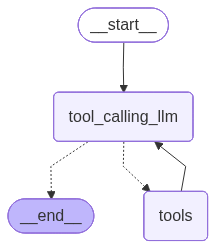

In [41]:
# Implementing Memory Saver 

from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()
graph_memory = builder.compile(checkpointer=memory)

# View

display(Image(graph_memory.get_graph().draw_mermaid_png()))

In [43]:
# Invocation
# Specifying the thread , This thread is defined for each conversation , Let say user login and one thread will be automatically assigned to him
# and that user whole conversation will be maintained within that thread (Its short time once re-login conversation will disappear as this is not stored in persistant memory like storage. It stored in temprory storage)
config = {"configurable":{"thread_id":"1"}}
messages = graph_memory.invoke({"messages":" Add two number 5 and 7"},config=config)

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

 Add two number 5 and 7
================================== Ai Message ==================================
Tool Calls:
  add (8cqj03ryq)
 Call ID: 8cqj03ryq
  Args:
    a: 5
    b: 7
================================= Tool Message =================================
Name: add

12
================================== Ai Message ==================================

The sum of 5 and 7 is **12**.


In [46]:
# Now above info is saved in temp memory and now if i ask another message with less info or info from above chat it will give me answer
messages = graph_memory.invoke({"messages":" Divide that result with 3"},config=config)

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

 Add two number 5 and 7
================================== Ai Message ==================================
Tool Calls:
  add (8cqj03ryq)
 Call ID: 8cqj03ryq
  Args:
    a: 5
    b: 7
================================= Tool Message =================================
Name: add

12
================================== Ai Message ==================================

The sum of 5 and 7 is **12**.
================================ Human Message =================================

 Divide that result with 3
================================== Ai Message ==================================
Tool Calls:
  Division (0dnm74m0h)
 Call ID: 0dnm74m0h
  Args:
    a: 12
    b: 3
================================= Tool Message =================================
Name: Division

4.0
================================== Ai Message ==================================

The result of dividing 12 by 3 is $\boxed{4.0}$.
==========================

In [48]:
## Now i will create another config for new user conversation 

config_1= {"configurable":{"thread_id":"Pawan"}}
messages = graph_memory.invoke({"messages":" Who is Elon Musk and his net worth in 2 line"},config=config)

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

 Who is Elon Musk and his net worth in 2 line
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (wjqykrwha)
 Call ID: wjqykrwha
  Args:
    query: Elon Musk net worth 2023
  wikipedia (f8f3nfbht)
 Call ID: f8f3nfbht
  Args:
    query: Elon Musk
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The world's 10 wealthiest people got nearly half a trillion ...", "url": "https://fortune.com/2024/01/02/how-rich-top-10-billionaires-2023-wealth-increase-elon-musk-bernard-arnault/", "content": "The gains were across the board, though no one saw a bigger jump than Elon Musk, who was worth $137 billion on Jan. 2, 2023, and now stands at $229 billion, according to Bloomberg’s Billionaires Index. Close behind him in terms of gains was Meta founder Mark Zuckerberg, who jum

In [49]:

messages = graph_memory.invoke({"messages":" What was my last question ?"},config=config_1)

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

 Who is Elon Musk and his net worth in 2 line
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (wjqykrwha)
 Call ID: wjqykrwha
  Args:
    query: Elon Musk net worth 2023
  wikipedia (f8f3nfbht)
 Call ID: f8f3nfbht
  Args:
    query: Elon Musk
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The world's 10 wealthiest people got nearly half a trillion ...", "url": "https://fortune.com/2024/01/02/how-rich-top-10-billionaires-2023-wealth-increase-elon-musk-bernard-arnault/", "content": "The gains were across the board, though no one saw a bigger jump than Elon Musk, who was worth $137 billion on Jan. 2, 2023, and now stands at $229 billion, according to Bloomberg’s Billionaires Index. Close behind him in terms of gains was Meta founder Mark Zuckerberg, who jum